In [ ]:
# Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, 
# radiowa i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. 
# Można przedstawić zyski jako funkcję  𝑍(𝑤𝑇𝑉,𝑤𝑟𝑎𝑑𝑖𝑜,𝑤𝑝𝑟𝑎𝑠𝑎). 
# Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji
# i dokonać ewaluacji tej sieci. Proszę porównać wyniki dla przynajmniej dwóch różnych struktur
# jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh).
# Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące.

In [ ]:
import csv
import numpy as np

file = open("Advertising.csv", "r")
lines = list(csv.reader(file, delimiter=","))
file.close()

lines = lines[1:]
data = np.array([[float(i) for i in line]for line in lines])
data = data[:, 1:]
# print(data)

In [ ]:
data_norm = np.empty([len(data), len(data[0])])
for i in range(len(data[0])):
    data_norm[:,i] = np.array(data[:,i] / max(data[:,i]))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_norm[:,:3], data_norm[:,-1], test_size=0.2)

In [ ]:
from sklearn.neural_network import MLPRegressor


print("----------------------- (110, 110, 110) relu -----------------------")

network1 = MLPRegressor(solver='adam',hidden_layer_sizes=(110, 110, 110), max_iter = 1000, tol = 0.001, activation = 'relu')

network1.fit(x_train, y_train)
print("train: "+str(network1.score(x_train, y_train)))
print("test: "+str(network1.score(x_test, y_test)))

----------------------- (110, 110, 110) relu -----------------------
train: 0.7927176241243223
test: 0.755732519946682


In [ ]:
print("----------------------- (110, 110, 110) tanh -----------------------")

network3 = MLPRegressor(solver='adam',hidden_layer_sizes=(110, 110, 110), max_iter = 1000, tol = 0.001, activation = 'tanh')

network3.fit(x_train, y_train)
print("train: "+str(network3.score(x_train, y_train)))
print("test: "+str(network3.score(x_test, y_test)))

----------------------- (110, 110, 110) tanh -----------------------
train: 0.5497307663808035
test: 0.4598228368505737


W większości przypadków relu ma lepsze wykini niż tanh

In [ ]:
print("----------------------- (150, 150) relu -----------------------")

network4 = MLPRegressor(solver='adam',hidden_layer_sizes=(150, 150), max_iter = 1000, tol = 0.001, activation = 'relu')

network4.fit(x_train, y_train)
print("train: "+str(network4.score(x_train, y_train)))
print("test: "+str(network4.score(x_test, y_test)))

----------------------- (150, 150) relu -----------------------
train: 0.6317669356049853
test: 0.488838538525167


In [ ]:
print("----------------------- (10, 10, 10, 10) relu -----------------------")

network4 = MLPRegressor(solver='adam',hidden_layer_sizes=(10, 10, 10, 10), max_iter = 1000, tol = 0.001, activation = 'relu')

network4.fit(x_train, y_train)
print("train: "+str(network4.score(x_train, y_train)))
print("test: "+str(network4.score(x_test, y_test)))

----------------------- (10, 10, 10, 10) relu -----------------------
train: -0.04083956560700197
test: -0.1680145668665738


In [ ]:
# Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji 
# 𝑓(𝑥)=𝑠𝑖𝑛(𝑥) w przedziale  [−2𝜋,2𝜋]. Proszę użyć  𝑡𝑎𝑛ℎ
# jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. 
# Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać 
# wzór funkcji aproksymującej.

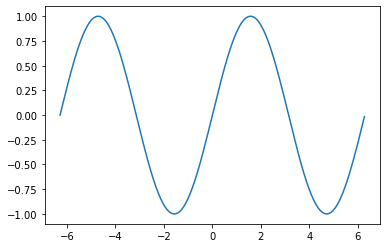

In [ ]:
import math
import matplotlib.pyplot as plt

x = np.arange(-2*math.pi, 2*math.pi, 0.05)
y = np.sin(x)

plt.plot(x,y)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y)
x_matrix = x.reshape(-1,1)

network2 = MLPRegressor(solver='adam',hidden_layer_sizes=(7), max_iter = 1000, tol = 0.0001, activation = 'tanh')

network2.fit(x_matrix, y)
print(network2.score(x_matrix, y))

0.8097354902403293


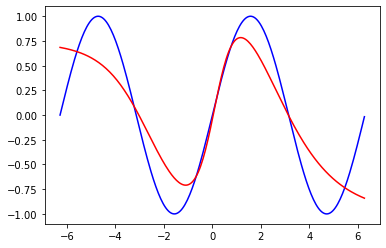

In [ ]:
y_pred = network2.predict(x_matrix)

plt.plot(x,y,'b')
plt.plot(x,y_pred,'r')
plt.show()

In [ ]:
print(network2.coefs_)
print(network2.intercepts_)

[array([[-0.46766801, -0.55745717,  0.23740007,  1.29404246,  1.01660698,
        -0.35636137, -0.6692418 ]]), array([[ 0.32639164],
       [ 0.74516493],
       [-0.42429239],
       [ 0.70294647],
       [ 0.47431018],
       [ 0.92492447],
       [-0.36939932]])]
[array([ 1.09552237, -1.46605962, -0.14320959, -0.1407411 , -0.04812494,
        0.7582902 ,  0.09010268]), array([-0.12867944])]


In [ ]:
x_sample = x[0]
y_sample = y[0]

w = network2.coefs_
b = network2.intercepts_

hidden_layer_values = np.tanh(x_sample * w[0]) + b[0]

y_sample_pred = np.tanh(np.dot(hidden_layer_values, w[1])) + b[1]
print(y_sample_pred)
print(y_pred[0])

[[0.46390721]]
0.6847472734901058


In [ ]:
# Proszę pobrać zbiór california housing 
# (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), 
# jest też dostępny w colabie jako przykładowy plik testowy). 

# Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku,
# takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujących się
# w nim mieszkań i sypialni, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje
# się mediana wartości mieszkania w tym bloku. 

# Proszę znormalizować dane, a następnie 
# zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają 
# aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. 
# Proszę spróbować osiągnąć jak najlepszy wynik (jak najwyższe  𝑅2). 
# Wyniki oczywiście proszę sprawdzać na danych testujących.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

x = np.array(california.data)
y = np.array(california.target)

In [ ]:
x_norm = np.empty([len(x), len(x[0])])
for i in range(len(x[0])):
    x_norm[:,i] = np.array(x[:,i] / max(x[:,i]))
y_norm = y / max(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2)

In [ ]:

from sklearn.neural_network import MLPRegressor
network10 = MLPRegressor(solver='adam',hidden_layer_sizes=(100, 100), max_iter = 1000, tol = 0.0001, activation = 'relu')
network10.fit(x_train, y_train)
print(network10.score(x_train, y_train))
print(network10.score(x_test, y_test))

0.7117883696727871
0.7161884464755615


In [ ]:
network11 = MLPRegressor(solver='adam',hidden_layer_sizes=(40, 40, 40), max_iter = 1000, tol = 0.0001, activation = 'relu')
network11.fit(x_train, y_train)
print(network11.score(x_train, y_train))
print(network11.score(x_test, y_test))

0.6771447339894605
0.68626459313944


In [ ]:
network12 = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80, 80), max_iter = 1000, tol = 0.0001, activation = 'relu')
network12.fit(x_train, y_train)
print(network12.score(x_train, y_train))
print(network12.score(x_test, y_test))

0.6434851273375336
0.6521735033691594


In [ ]:
network13 = MLPRegressor(solver='adam',hidden_layer_sizes=(250, 250, 250, 250, 250), max_iter = 1000, tol = 0.0001, activation = 'relu')
network13.fit(x_train, y_train)
print(network13.score(x_train, y_train))
print(network13.score(x_test, y_test))

0.7263525441687055
0.7304854590987925


In [ ]:
network14 = MLPRegressor(solver='adam',hidden_layer_sizes=(5), max_iter = 1000, tol = 0.0001, activation = 'relu')
network14.fit(x_train, y_train)
print(network14.score(x_train, y_train))
print(network14.score(x_test, y_test))

0.4972945772891276
0.5279189421661414


In [ ]:
# Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci 
# (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych
# przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać
# oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

In [ ]:
network11.n_iter_

83

In [ ]:
print(network11.loss_curve_)

[0.016179455696790454, 0.012466377547903848, 0.012370860010133235, 0.012135177591726838, 0.012197055110555006, 0.01195521713984283, 0.0120271732226813, 0.011887191662797073, 0.011810265826564411, 0.011803804154483207, 0.011872284683407314, 0.011736588000589526, 0.011697159899724618, 0.0115934801535571, 0.011641629622316896, 0.011613400304156295, 0.011362610270782392, 0.011450612146103408, 0.011333022657158387, 0.011245539565968899, 0.01119420542685526, 0.011189564624702317, 0.011095293876816686, 0.011085513674203365, 0.011014531083438386, 0.010788855982274503, 0.0107783743786022, 0.010617541777325748, 0.010628730024995902, 0.01049621636403876, 0.01041332969670029, 0.010248932892261623, 0.010095119604165538, 0.010130761131023198, 0.010137071891830676, 0.009987433350911588, 0.010028219049054585, 0.009723688800188477, 0.009577421229697925, 0.00978999667110942, 0.009665309974525305, 0.009530778798229719, 0.009499362698607622, 0.009416166085892172, 0.009668902502052388, 0.009248080709142422

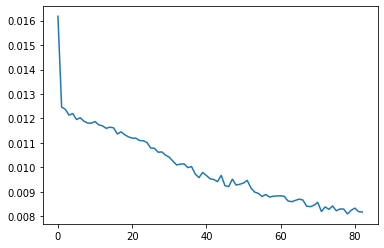

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(network11.n_iter_), network11.loss_curve_)
plt.show()

In [ ]:
# Proszę sprawdzić wyniki regresji dla zbioru california housing dla różnych podziałów
# na dane uczące i testujące (dla co najmniej pięciu podziałów 20-80, 35-65, 50-50, 65-35, 80-20)
# i wyciągnąć wnioski.

In [ ]:
print("--------------- 20-80 ---------------")
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2)
network12.fit(x_train, y_train)
print(network12.score(x_train, y_train))
print(network12.score(x_test, y_test))
print()

print("--------------- 35-65 ---------------")
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.35)
network12.fit(x_train, y_train)
print(network12.score(x_train, y_train))
print(network12.score(x_test, y_test))
print()

print("--------------- 50-50 ---------------")
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.5)
network12.fit(x_train, y_train)
print(network12.score(x_train, y_train))
print(network12.score(x_test, y_test))  
print()

print("--------------- 65-35 ---------------")
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.65)
network12.fit(x_train, y_train)
print(network12.score(x_train, y_train))
print(network12.score(x_test, y_test))
print()

print("--------------- 80-20 ---------------")
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.8)
network12.fit(x_train, y_train)
print(network12.score(x_train, y_train))
print(network12.score(x_test, y_test))

--------------- 20-80 ---------------
0.7147521630690953
0.7071467021766079

--------------- 35-65 ---------------
0.7234114021304714
0.7161147224170218

--------------- 50-50 ---------------
0.6657494248851128
0.6593242079128194

--------------- 65-35 ---------------
0.6833414505075275
0.6844845041205943

--------------- 80-20 ---------------
0.630661268834529
0.6055668873437895
